<a href="https://colab.research.google.com/github/arjun-p3/Data-Mining-Assignment/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Name : Arjun P
Roll Number: ATP22CS017
Class : S8 CSE
```


# **Importing Libraries**

In [ ]:

#importing libraraies

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

# **Data Loading and Exploration**

In [ ]:

#loading dataset

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining Assignment /Students_Dataset.csv")

In [ ]:

#data exploration

print(f"Number of records : {df.shape[0]}")
print(f"Number of attributes : {df.shape[1]}")

Number of records : 100
Number of attributes : 5


In [ ]:

#class distribution of numerical values

df.describe()

,Age,Study_Hours,Attendance,Internal_Marks
count,100.000000,100.000000,100.000000,100.000000
mean,16.680000,2.040000,94.730000,21.620000
std,1.324821,0.875249,6.600972,6.725168
min,15.000000,1.000000,62.000000,8.000000
25%,16.000000,1.000000,92.000000,16.000000
50%,17.000000,2.000000,97.000000,21.500000
75%,18.000000,2.000000,100.000000,26.000000
max,20.000000,4.000000,100.000000,37.000000


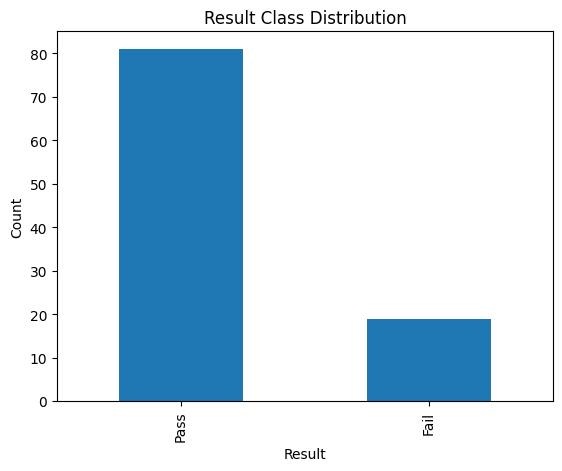

In [ ]:

# Plot the "Result" class distribution of categorical values

df['Result'].value_counts().plot(kind='bar')

plt.title('Result Class Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


# **Data Preprocessing**

In [ ]:

#checking for missing values

print(df.isnull().sum())

#no missing values found

Age               0
Study_Hours       0
Attendance        0
Internal_Marks    0
Result            0
dtype: int64


In [ ]:

#converting categorical attributes to numerical form

Result_mapping = {'Pass' : 1, 'Fail' : 0}
df['Result'] = df['Result'].map(Result_mapping)


In [ ]:

#creating train - test split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Result', axis = 1),df['Result'], test_size=0.2, random_state =42)


In [ ]:

#normalizing numerical attributes

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Feature Selection**

In [ ]:

#finding the most important feature

importance = mutual_info_classif(X_train_scaled, y_train,random_state=42)
print("Importance of Features \n")
print(f"Age{" "*12}: {importance[0]}")
print(f"Study_Hours{" "*4}: {importance [1]}")
print(f"Attendance{" "*4} : {importance [2]}")
print(f"Internal_Marks : {importance [3]}")

# "Internal_Marks" is the most important feature

Importance of Features 

Age            : 0.009251250750475615 
Study_Hours    : 0.0
Attendance     : 0.0003759937659206791 
Internal_Marks : 0.22657449409852726


# **Decision Tree Classification**

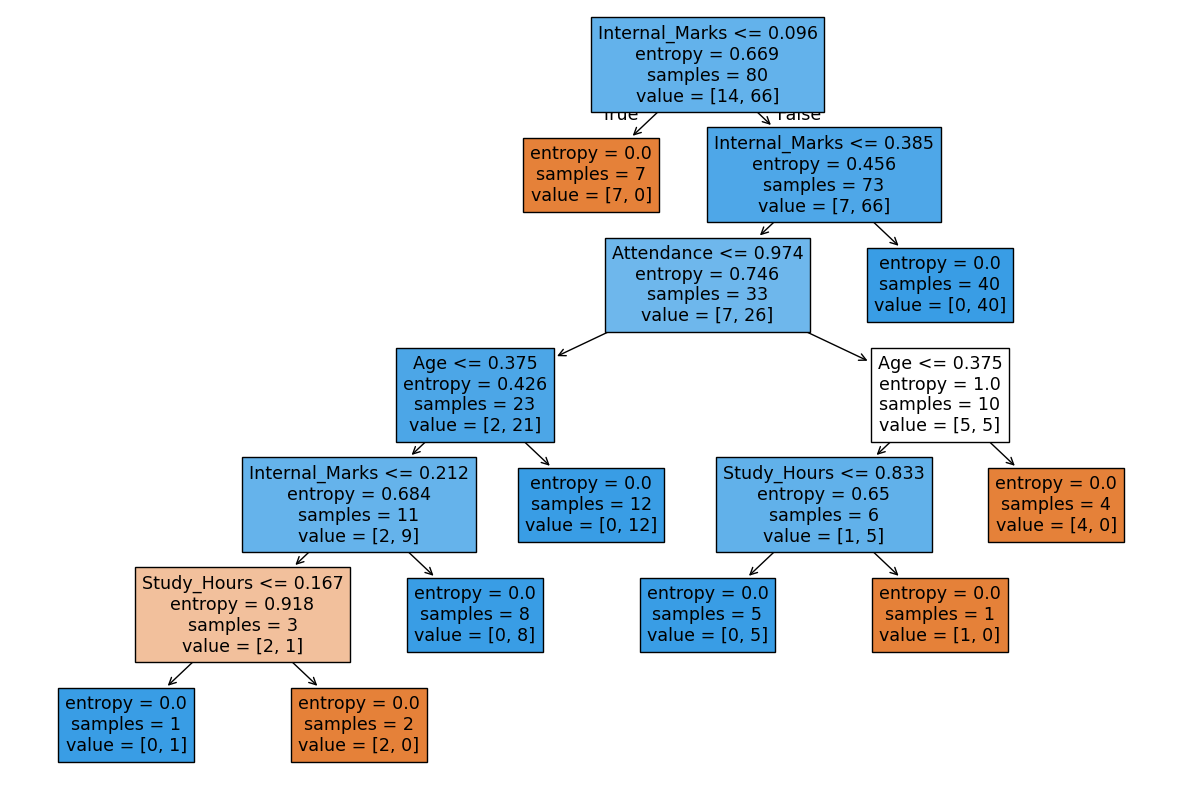

In [ ]:

#creating Decision tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

#training the model
model.fit(X_train_scaled, y_train)

#visializing
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()


# **Evaluation**

In [ ]:

#getting evaluation metrics
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

#printing results
print(f"Accuracy : {accuracy_score}")
print(f"Precision: {precision_score}")
print(f"Recall   : {recall_score}")
print(f"f1 score : {f1_score}")

Accuracy : 0.9
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
f1 score : 0.9333333333333333
